# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [12]:
df = pd.read_csv("data/comprar_alquilar.csv")

In [13]:
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [15]:
df.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

In [16]:
df.mean(axis=0)

ingresos            4958.995050
gastos_comunes       971.584158
pago_coche           211.742574
gastos_otros         515.425743
ahorros            38749.668317
vivienda          373349.638614
estado_civil           1.024752
hijos                  1.232673
trabajo                4.490099
comprar                0.331683
dtype: float64

In [17]:
df.var(axis=0)

ingresos          2.832026e+06
gastos_comunes    7.404187e+04
pago_coche        1.561019e+04
gastos_otros      2.825864e+04
ahorros           3.015513e+08
vivienda          1.859719e+10
estado_civil      7.008768e-01
hijos             1.870967e+00
trabajo           6.430250e+00
comprar           2.227723e-01
dtype: float64

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

<AxesSubplot:xlabel='ingresos', ylabel='gastos_comunes'>

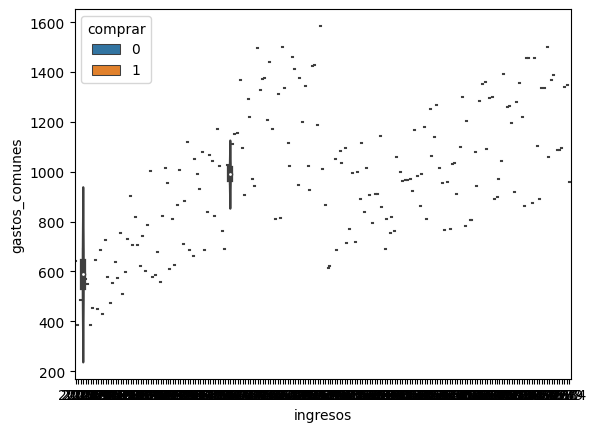

In [18]:
sns.violinplot(data=df, x="ingresos", y="gastos_comunes", hue="comprar")

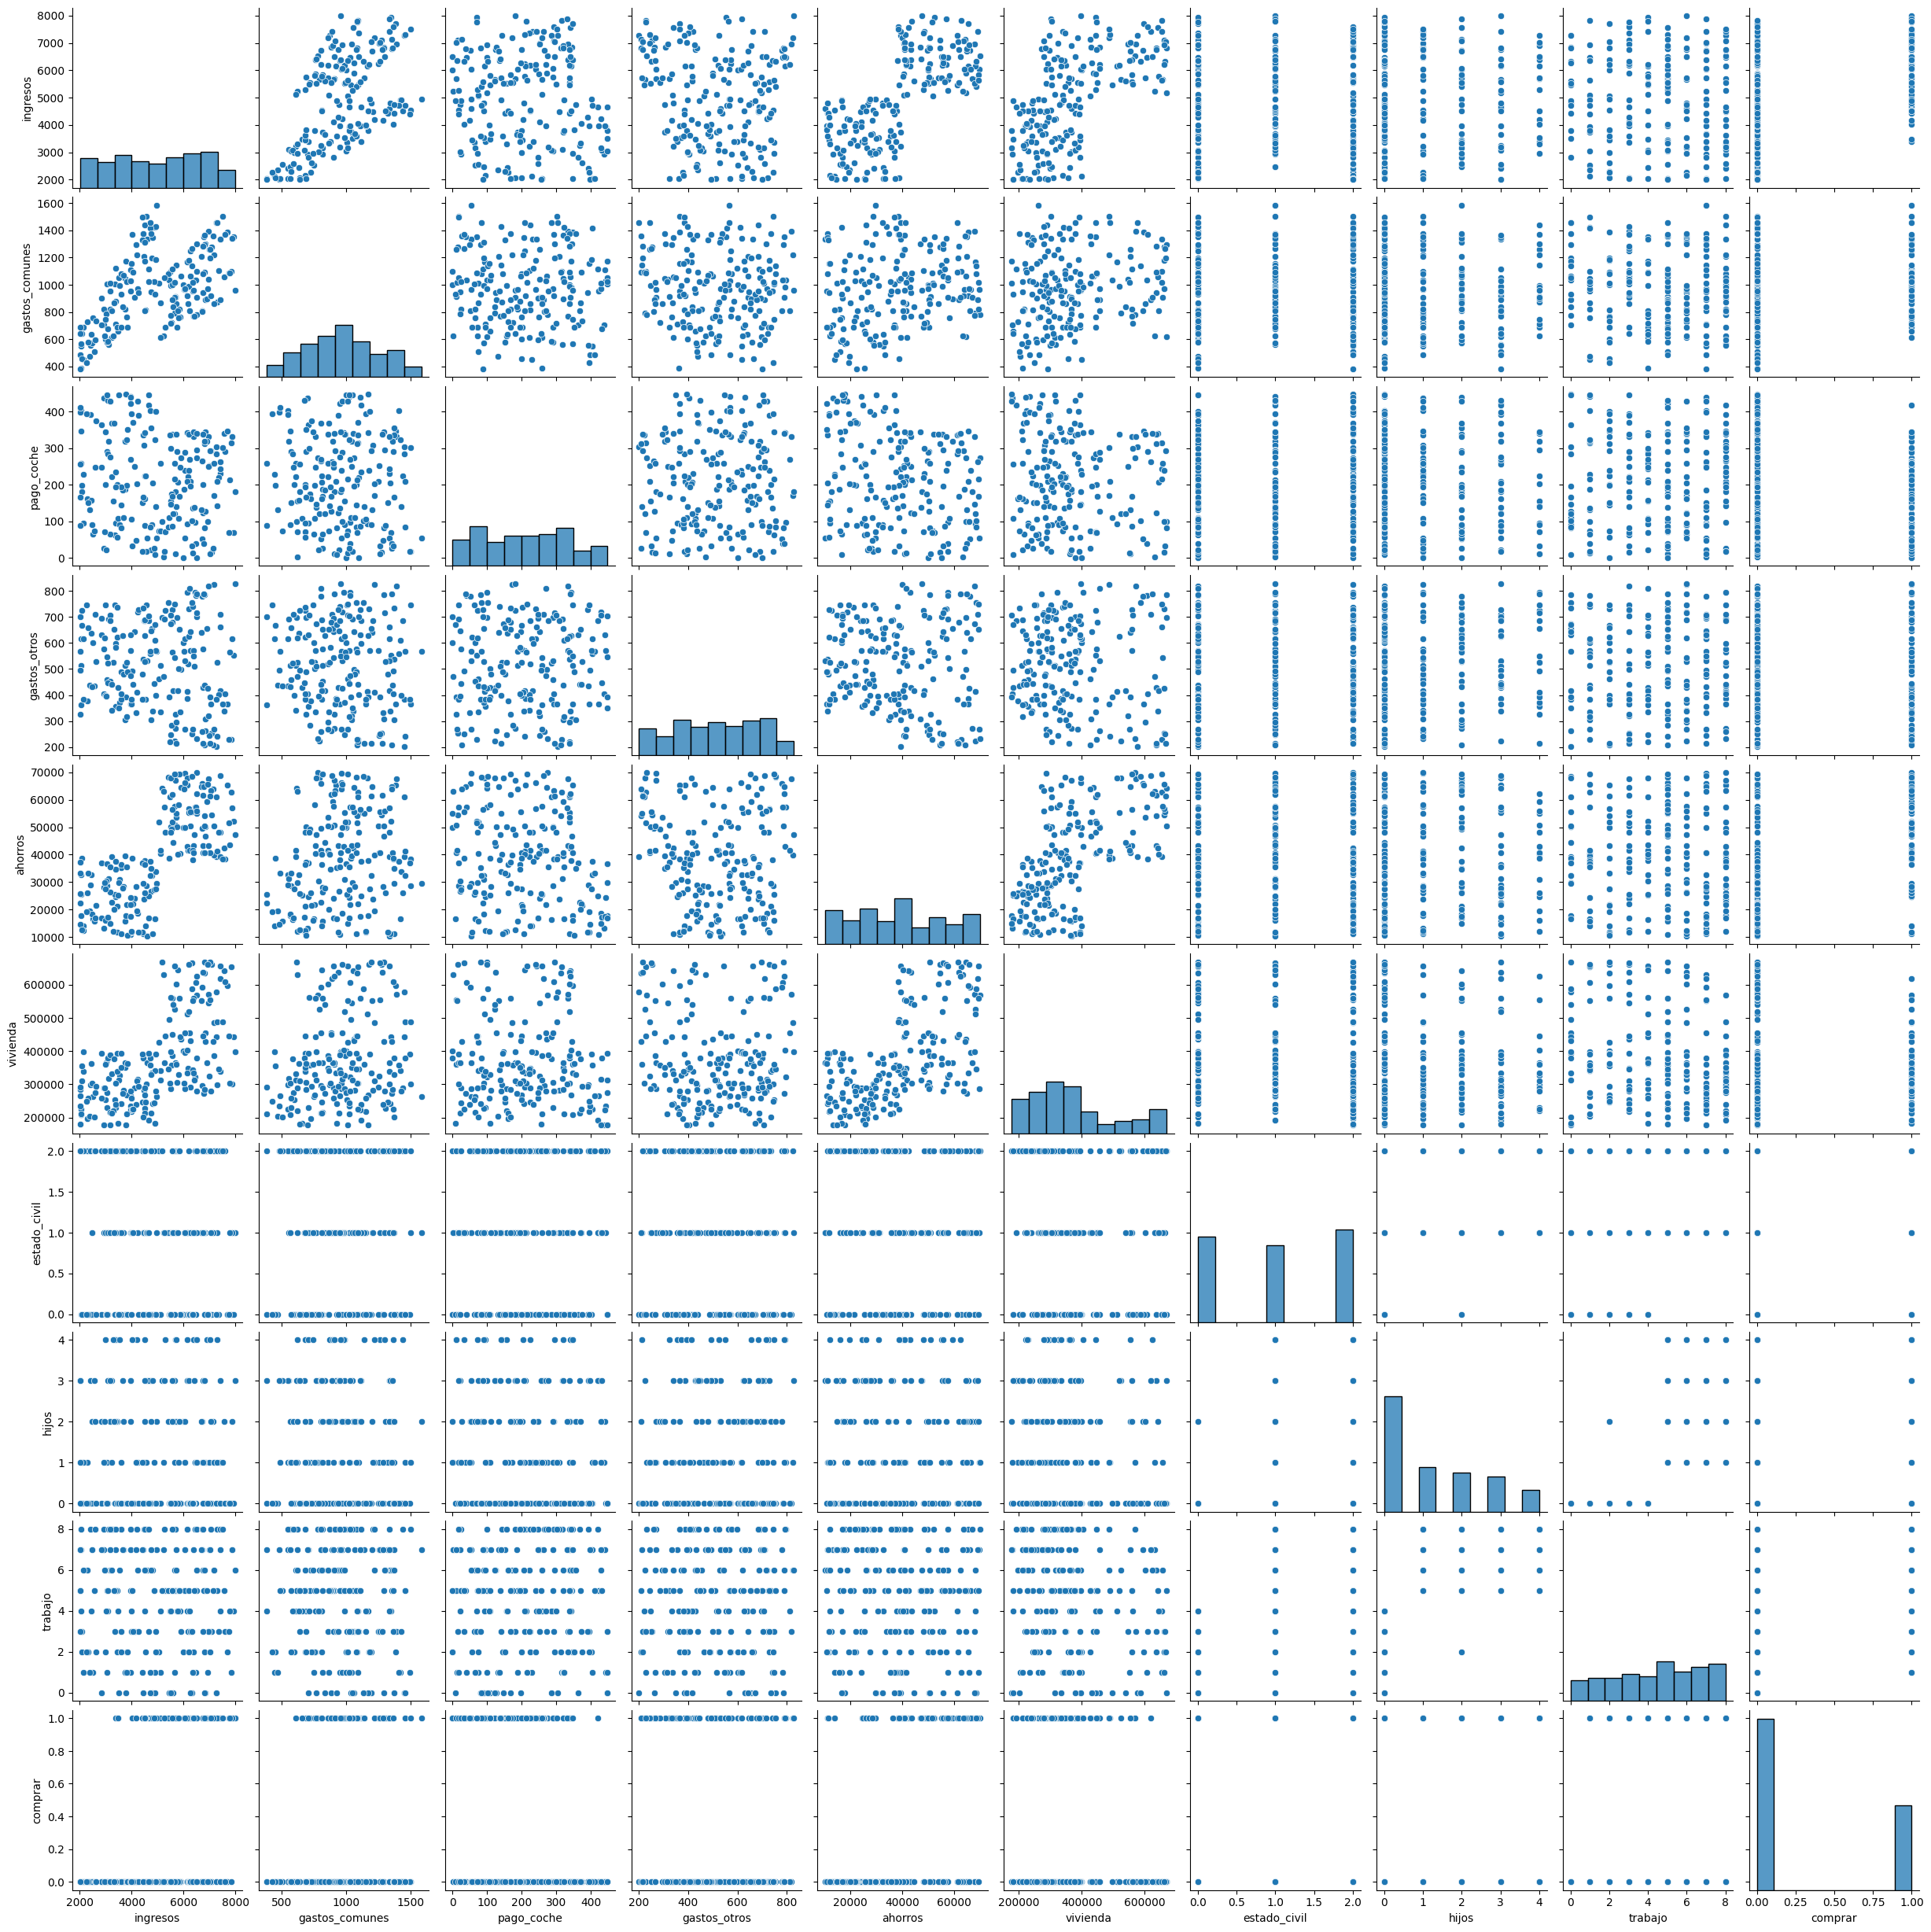

In [19]:
sns.pairplot(df)

In [20]:
df.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [21]:
x = df.drop(columns=["comprar"])
y = df["comprar"]

In [22]:
scaler = StandardScaler()
scaler.fit(x)
x_scal = scaler.transform(x)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [23]:
pca = PCA(n_components=9)
pca.fit(x_scal)
pca_a = pca.transform(x_scal)

In [24]:
pca_a.shape

(202, 9)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [25]:
#1
print(pca.explained_variance_ratio_)

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]


In [26]:
#2
print(np.cumsum(pca.explained_variance_ratio_[0]))

[0.29913557]


In [27]:
#3
print("5 Componentes:", sum(pca.explained_variance_ratio_[0:5]))

5 Componentes: 0.852406211771431


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

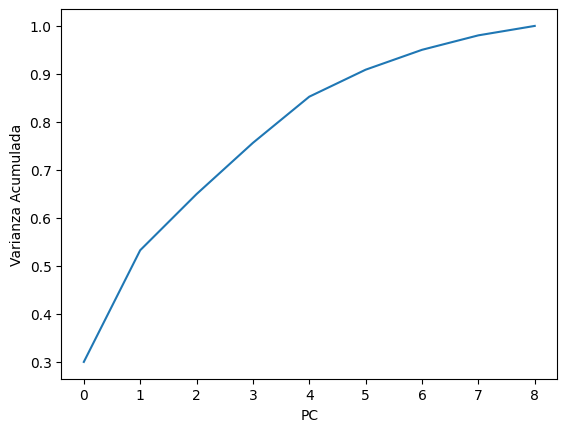

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PC")
plt.ylabel("Varianza Acumulada")
plt.show()

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

<AxesSubplot:>

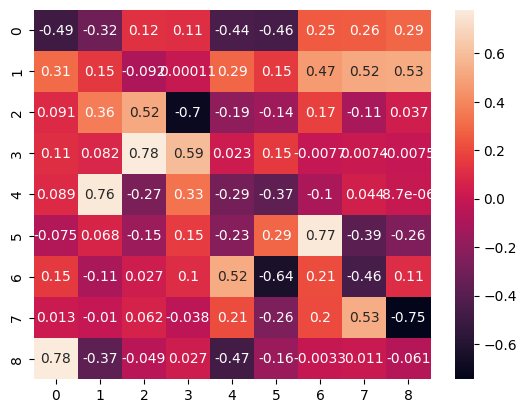

In [29]:
sns.heatmap(pca.components_, annot=True)

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
predict = pipe.predict(x_test)
print(accuracy_score(predict, y_test))
# print(accuracy_score(predict, y_train))

0.7560975609756098


<AxesSubplot:>

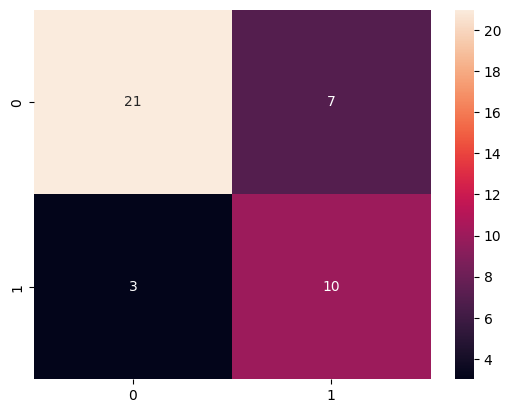

In [35]:
confu = confusion_matrix(predict, y_test,)
sns.heatmap(confu, annot=True)

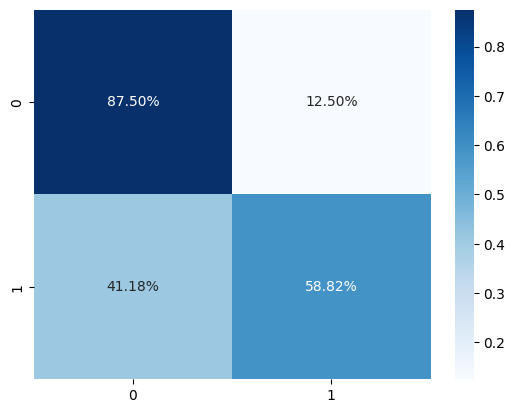

In [36]:
sns.heatmap(confusion_matrix(y_test, predict, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [37]:
# seed = 2023
grid_knn = KNeighborsClassifier()
param_knn = {
    "n_neighbors": [2,3,4,5,6,7,8,9,10]
}
gridd_knn = GridSearchCV(estimator=grid_knn,param_grid=param_knn,cv=10)
gridd_knn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [38]:
print("Mejores parámetros:", gridd_knn.best_params_,)
print("Score:", gridd_knn.best_score_)

Mejores parámetros: {'n_neighbors': 2}
Score: 0.8444852941176471


In [79]:
pca = PCA()
param_pca = {
    "n_components": [2,3,4,5,6,7,8,9,10]
}
grid_pca = GridSearchCV(estimator=pca, param_grid=param_pca, cv=10)
grid_pca.fit(x_train, y_train)

c:\Users\arica\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arica\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arica\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_pca.py", line 382, in fit
    self._fit(X)
  File "c:\Users\arica\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_pca

GridSearchCV(cv=10, estimator=PCA(),
             param_grid={'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [80]:
print("Mejores parámetros:", grid_pca.best_params_,)
print("Score:", grid_pca.best_score_)

Mejores parámetros: {'n_components': 8}
Score: -57.18193072665029


In [39]:
import pickle